In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import sys

sys.path.append('../')

from dependencies import utils

In [2]:
tracks = utils.load('../data/fma_metadata/tracks.csv')
features = utils.load('../data/fma_metadata/features.csv')

In [3]:
small = tracks['set', 'subset'] <= 'small'


X = features.loc[small]
y = tracks['track', 'genre_top'].loc[small]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


linearSVM = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False)
y_pred = linearSVM.fit(X=X_train, y=y_train).predict(X_test)

c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
print(linearSVM.classes_)

['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock']


               precision    recall  f1-score   support

   Electronic       0.50      0.59      0.54       188
 Experimental       0.49      0.45      0.47       203
         Folk       0.66      0.60      0.63       214
      Hip-Hop       0.61      0.62      0.61       209
 Instrumental       0.53      0.57      0.55       191
International       0.61      0.65      0.63       204
          Pop       0.32      0.23      0.27       197
         Rock       0.59      0.68      0.63       194

     accuracy                           0.55      1600
    macro avg       0.54      0.55      0.54      1600
 weighted avg       0.54      0.55      0.54      1600



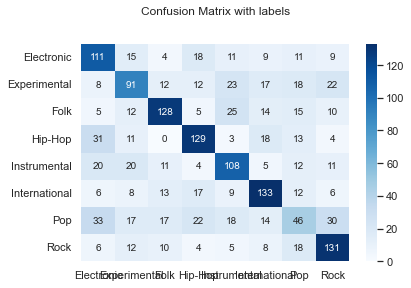

In [6]:
print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(linearSVM.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(linearSVM.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()

               precision    recall  f1-score   support

   Electronic       0.62      0.38      0.47       188
 Experimental       0.63      0.25      0.36       203
         Folk       0.70      0.50      0.58       214
      Hip-Hop       0.59      0.50      0.54       209
 Instrumental       0.62      0.45      0.52       191
International       0.80      0.34      0.48       204
          Pop       0.21      0.75      0.33       197
         Rock       0.61      0.46      0.52       194

     accuracy                           0.45      1600
    macro avg       0.60      0.45      0.48      1600
 weighted avg       0.60      0.45      0.48      1600



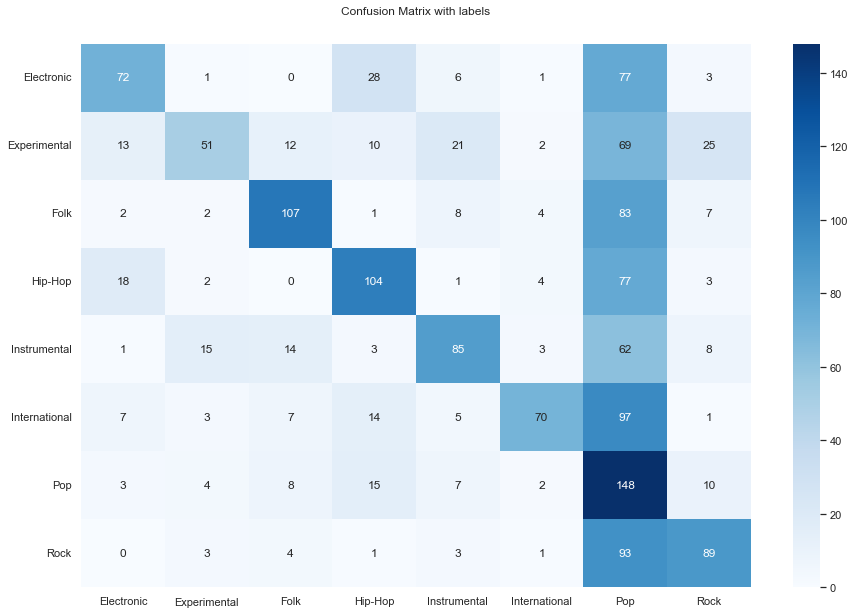

In [7]:
polySVC = svm.SVC(kernel='poly')
y_pred = polySVC.fit(X=X_train, y=y_train).predict(X_test)


print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(linearSVM.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(linearSVM.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear', 'sigmoid'],
    }, {
    'C': [0.1, 1, 10, 100, 1000],  
    'degree': [2,3,4,5],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['poly'],
}]

grid = GridSearchCV(svm.SVC(), param_grid)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


               precision    recall  f1-score   support

   Electronic       0.65      0.65      0.65       215
 Experimental       0.47      0.51      0.49       187
         Folk       0.68      0.68      0.68       206
      Hip-Hop       0.64      0.72      0.68       196
 Instrumental       0.64      0.59      0.61       187
International       0.72      0.70      0.71       213
          Pop       0.46      0.43      0.45       207
         Rock       0.66      0.63      0.64       189

     accuracy                           0.62      1600
    macro avg       0.61      0.61      0.61      1600
 weighted avg       0.62      0.62      0.62      1600



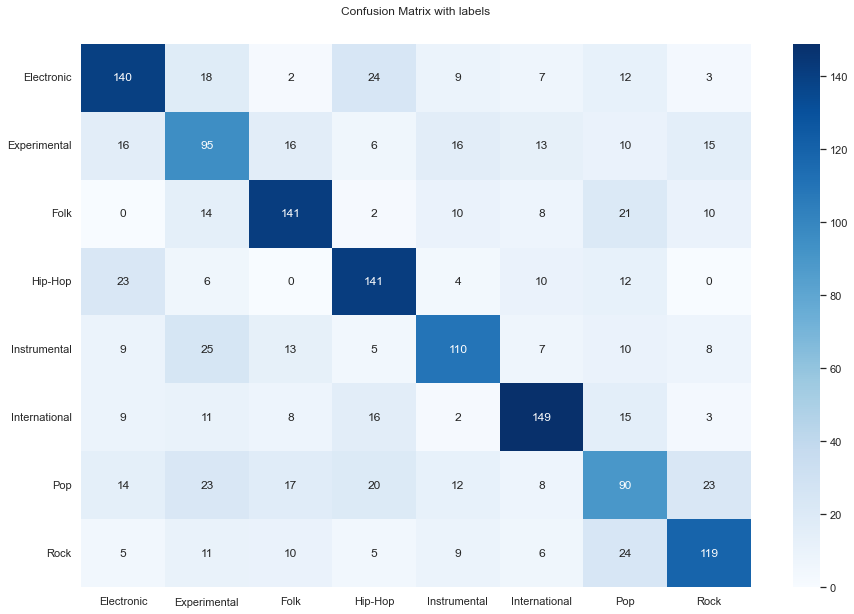

In [16]:
grid_pred = grid.predict(X_test)

print(classification_report(y_test, grid_pred))
cf_mat = confusion_matrix(y_test, grid_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(linearSVM.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(linearSVM.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'], 
    'kernel': ['rbf'],
    }

grid = GridSearchCV(svm.SVC(), param_grid)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


               precision    recall  f1-score   support

   Electronic       0.55      0.69      0.61       188
 Experimental       0.52      0.61      0.56       203
         Folk       0.75      0.72      0.73       214
      Hip-Hop       0.73      0.63      0.68       209
 Instrumental       0.62      0.63      0.63       191
International       0.81      0.73      0.77       204
          Pop       0.47      0.41      0.44       197
         Rock       0.68      0.68      0.68       194

     accuracy                           0.64      1600
    macro avg       0.64      0.64      0.64      1600
 weighted avg       0.64      0.64      0.64      1600



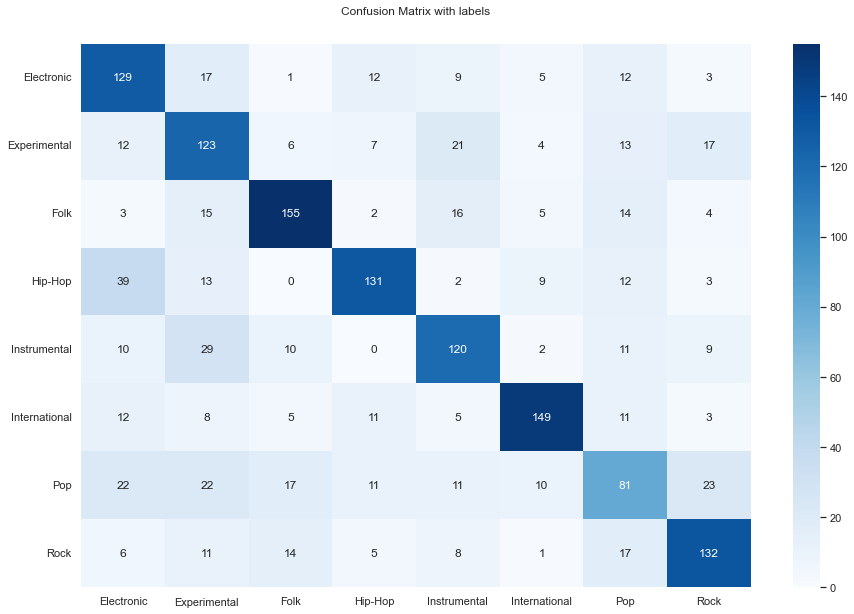

In [9]:
grid_pred = grid.predict(X_test)

print(classification_report(y_test, grid_pred))
cf_mat = confusion_matrix(y_test, grid_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(linearSVM.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(linearSVM.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()

c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198g\lib\site-packages\sklearn\svm\_base.p

{'C': 1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
               precision    recall  f1-score   support

   Electronic       0.52      0.60      0.55       188
 Experimental       0.49      0.44      0.47       203
         Folk       0.67      0.62      0.64       214
      Hip-Hop       0.62      0.63      0.62       209
 Instrumental       0.53      0.57      0.55       191
International       0.60      0.65      0.63       204
          Pop       0.34      0.24      0.28       197
         Rock       0.60      0.69      0.64       194

     accuracy                           0.56      1600
    macro avg       0.55      0.55      0.55      1600
 weighted avg       0.55      0.56      0.55      1600



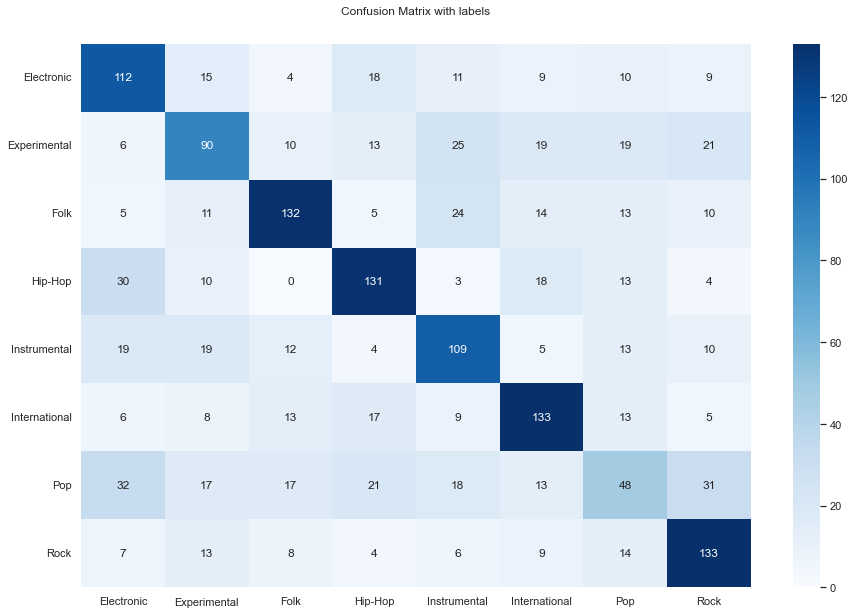

In [11]:
param_grid = {
    'penalty': ['l1', 'l2'],  
    'loss': ['hinge', 'squared_hinge'], 
    'dual': [True, False],
    'C': [1, 10, 100]
    }

grid = GridSearchCV(svm.LinearSVC(), param_grid)
grid.fit(X_train, y_train)

print(grid.best_params_)

grid_pred = grid.predict(X_test)

print(classification_report(y_test, grid_pred))
cf_mat = confusion_matrix(y_test, grid_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(linearSVM.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(linearSVM.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()